**Single Neuron Model:**

**Importing Required Libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\4.linearsep.csv",header=None)

In [6]:
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [8]:
df[2].value_counts(normalize=True)*100

1.0    50.0
0.0    50.0
Name: 2, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

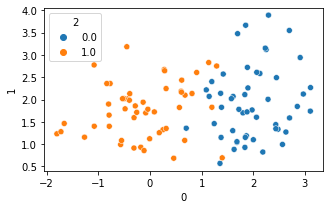

In [11]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=df[0],y=df[1],hue=df[2])

**Separating train and test data**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[[0,1]],df[2],train_size=0.9)

In [14]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(90, 2) (90,)
(10, 2) (10,)


**Standardizing the data**

In [15]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [16]:
std_train=std.fit_transform(x_train)

In [17]:
std_train

array([[ 1.61684634, -0.0110719 ],
       [ 0.81035101, -1.00950693],
       [ 0.29112241,  0.79025072],
       [-0.73380062, -0.21892166],
       [ 1.29345273,  0.91712638],
       [-0.44658836,  1.17919795],
       [ 0.91571517, -0.12473867],
       [-0.29950359, -1.68073672],
       [-1.30979232,  0.06590541],
       [-2.11148389, -0.89353422],
       [ 1.49647126, -0.38170899],
       [-1.10895669, -1.10893205],
       [-1.53421788,  1.32599526],
       [-1.09279462,  0.23944844],
       [-0.17584236,  0.83684959],
       [ 0.20562265,  0.52300656],
       [ 0.98837772,  1.08886913],
       [ 0.59450346,  0.24008282],
       [ 0.62161583,  0.31071304],
       [-0.91654187, -1.35212051],
       [-0.1239478 ,  0.35334641],
       [ 0.81610552,  2.60723561],
       [ 0.61578295, -0.79237439],
       [ 0.32814488, -0.56489409],
       [ 1.3870174 , -1.23596785],
       [-2.04820605, -0.82511126],
       [-0.89582541,  0.00627992],
       [-0.01588543,  0.40629738],
       [ 0.41791511,

In [18]:
std_test=std.transform(x_test)

In [19]:
std_test

array([[ 1.81895927, -0.16233838],
       [ 0.42808501,  0.41230283],
       [ 1.12066648,  1.86914351],
       [ 0.93516749, -1.08458593],
       [ 1.13432324,  1.82401807],
       [ 0.29239187, -0.03751738],
       [ 1.317862  , -0.74586384],
       [-0.44062982,  1.13885461],
       [ 0.68086131, -1.16725398],
       [ 0.45219068, -1.66790455]])

**Creating 1st Model**

**Creating Dense Layers**

In [20]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [65]:
model1 = Sequential()
model1.add(Dense(1, activation = 'relu', input_dim = 2, kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'relu', kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'relu', kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))

In [66]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 3         
                                                                 
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
 dense_30 (Dense)            (None, 1)                 2         
                                                                 
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [67]:
model1.compile(optimizer='SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Fitting**

In [69]:
save = model1.fit(x_train, y_train,batch_size=10, epochs = 100, validation_split= 0.1)

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 0.6932 - accuracy: 0.5062 - val_loss: 0.6935 - val_accuracy: 0.4444
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5309 - val_loss: 0.6934 - val_accuracy: 0.4444
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5309 - val_loss: 0.6938 - val_accuracy: 0.4444
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5309 - val_loss: 0.6937 - val_accuracy: 0.4444
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5309 - val_loss: 0.6935 - val_accuracy: 0.4444
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5309 - val_loss: 0.6939 - val_accuracy: 0.4444
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5309 - val_loss: 0.6943 - val_accuracy: 0.4444
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5309 - val_loss: 0.7006 - val_accuracy: 0.4444
Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5309 - val_loss: 0.7010 - val_accuracy: 0.4444
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5309 - val_loss: 0.7014 - val_accuracy: 0.4444
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5309 - val_loss: 0.7017 - val_accuracy: 0.4444
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5309 - val_loss: 0.7021 - val_accuracy: 0.4444
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5309 - val_loss: 0.7017 - val_accuracy: 0.4444
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5309 - val_loss: 0.7013 - val_accuracy: 0.4444
Epoch 66/100
9/9 [===============

In [70]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

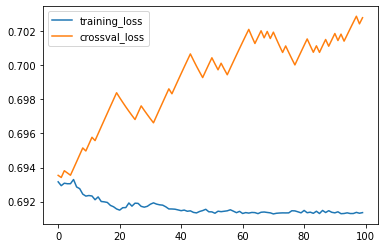

In [71]:
plt.plot(tl,label="training_loss")
plt.plot(cvl,label="crossval_loss")
plt.legend()

In [72]:
y_testpred=model1.evaluate(x_test,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.7221 - accuracy: 0.3000


In [73]:
y_testpred

[0.7220791578292847, 0.30000001192092896]

**Creating 2nd Model**

**Creating Dense Layers**

In [74]:
model2=Sequential()
model2.add(Dense(1,activation="tanh",input_dim=2))
model2.add(Dense(1,activation="tanh"))
model2.add(Dense(1,activation="tanh"))
model2.add(Dense(1,activation="sigmoid"))

In [75]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1)                 3         
                                                                 
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
 dense_34 (Dense)            (None, 1)                 2         
                                                                 
 dense_35 (Dense)            (None, 1)                 2         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [76]:
model2.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Fitting**

In [77]:
save2 = model2.fit(x_train, y_train,batch_size=10, epochs = 150, validation_split= 0.2)

Epoch 1/150
8/8 [==============================] - 1s 27ms/step - loss: 0.6726 - accuracy: 0.5417 - val_loss: 0.6692 - val_accuracy: 0.5000
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6697 - accuracy: 0.5833 - val_loss: 0.6663 - val_accuracy: 0.5556
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6666 - accuracy: 0.6111 - val_loss: 0.6635 - val_accuracy: 0.7222
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6633 - accuracy: 0.6389 - val_loss: 0.6605 - val_accuracy: 0.8333
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6600 - accuracy: 0.7222 - val_loss: 0.6574 - val_accuracy: 0.8333
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.7500 - val_loss: 0.6540 - val_accuracy: 0.8333
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6530 - accuracy: 0.8194 - val_loss: 0.6504 - val_accuracy: 0.8333
Epoch 8/150
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.4065 - accuracy: 0.9722 - val_loss: 0.4014 - val_accuracy: 0.9444
Epoch 60/150
8/8 [==============================] - 0s 7ms/step - loss: 0.4022 - accuracy: 0.9722 - val_loss: 0.3965 - val_accuracy: 1.0000
Epoch 61/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3990 - accuracy: 0.9722 - val_loss: 0.3922 - val_accuracy: 1.0000
Epoch 62/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3952 - accuracy: 0.9722 - val_loss: 0.3883 - val_accuracy: 1.0000
Epoch 63/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3914 - accuracy: 0.9722 - val_loss: 0.3845 - val_accuracy: 1.0000
Epoch 64/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3875 - accuracy: 0.9722 - val_loss: 0.3810 - val_accuracy: 0.9444
Epoch 65/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3837 - accuracy: 0.9722 - val_loss: 0.3775 - val_accuracy: 0.9444
Epoch 66/150
8/8 [===============

8/8 [==============================] - 0s 7ms/step - loss: 0.2509 - accuracy: 0.9722 - val_loss: 0.2386 - val_accuracy: 1.0000
Epoch 118/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.9722 - val_loss: 0.2365 - val_accuracy: 1.0000
Epoch 119/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2476 - accuracy: 0.9722 - val_loss: 0.2352 - val_accuracy: 1.0000
Epoch 120/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2459 - accuracy: 0.9722 - val_loss: 0.2338 - val_accuracy: 1.0000
Epoch 121/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.9722 - val_loss: 0.2324 - val_accuracy: 0.9444
Epoch 122/150
8/8 [==============================] - 0s 7ms/step - loss: 0.2426 - accuracy: 0.9722 - val_loss: 0.2305 - val_accuracy: 1.0000
Epoch 123/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2412 - accuracy: 0.9722 - val_loss: 0.2293 - val_accuracy: 0.9444
Epoch 124/150
8/8 [========

In [80]:
tl2 = save2.history["loss"]
cvl2 = save2.history["val_loss"]

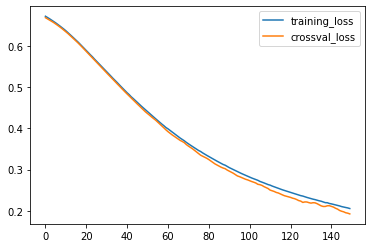

In [81]:
plt.plot(tl2,label="training_loss")
plt.plot(cvl2,label="crossval_loss")
plt.legend()

In [82]:
y_testpred2 = model2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.4656 - accuracy: 0.8000


In [83]:
y_testpred2

[0.46557456254959106, 0.800000011920929]

**Creating 3rd Model**

**Creating Dense layers**

In [58]:
model3 = Sequential()
model3.add(Dense(1, activation = 'sigmoid', input_dim = 2))
model3.add(Dense(1, activation = 'sigmoid'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.add(Dense(1, activation = 'sigmoid'))

**Compile**

In [59]:
model3.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Fitting**

In [60]:
save3 = model3.fit(x_train, y_train,batch_size=10, epochs = 100, validation_split= 0.1)

Epoch 1/100
9/9 [==============================] - 1s 37ms/step - loss: 0.7999 - accuracy: 0.4691 - val_loss: 0.7253 - val_accuracy: 0.5556
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7962 - accuracy: 0.4691 - val_loss: 0.7228 - val_accuracy: 0.5556
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7922 - accuracy: 0.4691 - val_loss: 0.7205 - val_accuracy: 0.5556
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7883 - accuracy: 0.4691 - val_loss: 0.7183 - val_accuracy: 0.5556
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7854 - accuracy: 0.4691 - val_loss: 0.7161 - val_accuracy: 0.5556
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7821 - accuracy: 0.4691 - val_loss: 0.7143 - val_accuracy: 0.5556
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7789 - accuracy: 0.4691 - val_loss: 0.7125 - val_accuracy: 0.5556
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 6ms/step - loss: 0.7016 - accuracy: 0.4691 - val_loss: 0.6747 - val_accuracy: 0.5556
Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.4691 - val_loss: 0.6745 - val_accuracy: 0.5556
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7008 - accuracy: 0.4691 - val_loss: 0.6743 - val_accuracy: 0.5556
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7001 - accuracy: 0.4691 - val_loss: 0.6742 - val_accuracy: 0.5556
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6993 - accuracy: 0.4691 - val_loss: 0.6740 - val_accuracy: 0.5556
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6987 - accuracy: 0.4691 - val_loss: 0.6738 - val_accuracy: 0.5556
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6980 - accuracy: 0.4691 - val_loss: 0.6737 - val_accuracy: 0.5556
Epoch 66/100
9/9 [===============

In [40]:
tl3 = save3.history["loss"]
cvl3 = save3.history["val_loss"]

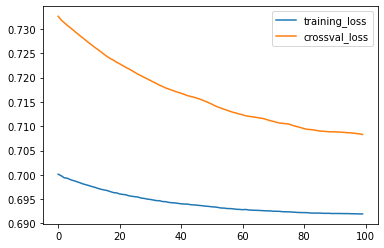

In [41]:
plt.plot(tl3,label="training_loss")
plt.plot(cvl3,label="crossval_loss")
plt.legend()

In [42]:
y_testpred3 = model1.evaluate(x_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.7014 - accuracy: 0.3000


In [43]:
y_testpred3

[0.7013803720474243, 0.30000001192092896]

**Creating 4th Model**

**Creating Dense layers**

In [44]:
model4=Sequential()
model4.add(Dense(1,activation="tanh",input_dim=2,kernel_initializer='glorot_uniform'))
model4.add(Dense(1,activation="tanh",kernel_initializer='glorot_uniform'))
model4.add(Dense(1,activation="tanh",kernel_initializer='glorot_uniform'))
model4.add(Dense(1,activation="sigmoid"))

In [45]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [47]:
model4.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

**Fitting**

In [48]:
save4 = model4.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_split= 0.1)

Epoch 1/100
9/9 [==============================] - 2s 27ms/step - loss: 0.6280 - accuracy: 0.7654 - val_loss: 0.6397 - val_accuracy: 0.6667
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6241 - accuracy: 0.7778 - val_loss: 0.6346 - val_accuracy: 0.6667
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6200 - accuracy: 0.7778 - val_loss: 0.6302 - val_accuracy: 0.6667
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6167 - accuracy: 0.8148 - val_loss: 0.6258 - val_accuracy: 0.6667
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6127 - accuracy: 0.8148 - val_loss: 0.6213 - val_accuracy: 0.6667
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6087 - accuracy: 0.8148 - val_loss: 0.6170 - val_accuracy: 0.6667
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6041 - accuracy: 0.8148 - val_loss: 0.6112 - val_accuracy: 0.6667
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.9753 - val_loss: 0.2915 - val_accuracy: 1.0000
Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3341 - accuracy: 0.9753 - val_loss: 0.2874 - val_accuracy: 1.0000
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3304 - accuracy: 0.9753 - val_loss: 0.2834 - val_accuracy: 1.0000
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3269 - accuracy: 0.9753 - val_loss: 0.2796 - val_accuracy: 1.0000
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3233 - accuracy: 0.9753 - val_loss: 0.2759 - val_accuracy: 1.0000
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3199 - accuracy: 0.9753 - val_loss: 0.2722 - val_accuracy: 1.0000
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3167 - accuracy: 0.9753 - val_loss: 0.2686 - val_accuracy: 1.0000
Epoch 66/100
9/9 [===============

In [49]:
tl4 = save4.history["loss"]
cvl4 = save4.history["val_loss"]

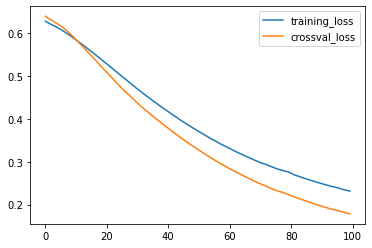

In [50]:
plt.plot(tl4,label="training_loss")
plt.plot(cvl4,label="crossval_loss")
plt.legend()

In [51]:
y_pred4 = model4.evaluate(x_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.4713 - accuracy: 0.8000


In [52]:
y_pred4

[0.4713370203971863, 0.800000011920929]

**Conclusion:**

- from the above models, for the 2nd model we got the best accuracy
- accuracy score : 0.9722
- optimizer : Adam
- loss : binary_crossentropy
- epochs : 150
- activation : tanh